# Лабораторная работа 4

Датасет - **Цены на бриллианты**	https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

1. **carat**: Вес бриллианта в каратах
2. **cut**: Качество огранки.
3. **color**: Цвет бриллианта
4. **clarity**: Чистота бриллианта
5. **depth**: Процент глубины бриллианта
6. **table**: Процент ширины бриллианта
7. **price**: Цена бриллианта в долларах США
8. **x**: Длина бриллианта в миллиметрах
9. **y**: Ширина бриллианта в миллиметрах
10. **z**: Глубина бриллианта в миллиметрах

**Бизнес-цели**: 
1. Прогнозирование цены бриллиантов на основании характеристик.
2. Анализ частотности и сочетания характеристик бриллиантов, которые пользуются наибольшим спросом, чтобы лучше планировать запасы. 

#### Загрузка набора данных

In [190]:
import pandas as pd

from sklearn import set_config

set_config(transform_output="pandas")

df = pd.read_csv("data/Diamonds.csv", index_col="id")

random_state=42

average_carat = df['carat'].mean()

print(f"Среднее значение поля 'карат': {average_carat}")

average_carat = df['carat'].mean()
df['above_average_carat'] = (df['carat'] > average_carat).astype(int)

df

Среднее значение поля 'карат': 0.7979346717831785


carat        cut color clarity  depth  table  price     x     y     z  \
id                                                                             
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   
53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49   
53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43   
53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47   

       above_average_carat  
id                          
1                        0  
2                        0  
3                        0  
4                        0  
5                        0  
...                    ...  
53939                    1  
53940                    0  
53941                    0  
53942                    0  
53943                    0  

[53943 rows x 11 columns]

#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- Cut

In [191]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.
    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().
    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="above_average_carat", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

carat        cut color clarity  depth  table  price     x     y     z  \
id                                                                             
38836   0.40  Very Good     F    VVS2   62.0   56.0   1049  4.71  4.74  2.93   
30260   0.40  Very Good     E     SI1   63.0   57.0    725  4.68  4.71  2.96   
33169   0.36      Ideal     E     VS1   61.8   56.0    817  4.55  4.58  2.82   
1029    0.70  Very Good     E     VS1   58.4   59.0   2904  5.83  5.91  3.43   
53809   0.81  Very Good     G     SI1   60.7   56.0   2733  6.06  6.09  3.69   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
2937    0.77       Good     E     VS2   63.4   57.0   3291  5.80  5.84  3.69   
7514    0.90       Good     F     SI1   61.8   63.0   4241  6.21  6.18  3.83   
48344   0.56      Ideal     H    VVS1   62.1   53.8   1961  5.27  5.33  3.29   
3212    0.70    Premium     F    VVS1   61.8   60.0   3348  5.67  5.63  3.49   
35654   0.31  Very Good     G    VVS2   63.1   57.0    907  4.32  4.30  2.72   

       above_average_carat  
id                          
38836                    0  
30260                    0  
33169                    0  
1029                     0  
53809                    1  
...                    ...  
2937                     0  
7514                     1  
48344                    0  
3212                     0  
35654                    0  

[43154 rows x 11 columns]

'y_train'

above_average_carat
id                        
38836                    0
30260                    0
33169                    0
1029                     0
53809                    1
...                    ...
2937                     0
7514                     1
48344                    0
3212                     0
35654                    0

[43154 rows x 1 columns]

'X_test'

carat        cut color clarity  depth  table  price     x     y     z  \
id                                                                             
32452   0.39  Very Good     E     VS2   60.9   58.0    793  4.72  4.77  2.89   
2432    0.72  Very Good     E     SI1   63.3   56.0   3183  5.67  5.71  3.60   
16456   1.21      Ideal     H     SI1   62.1   59.0   6573  6.81  6.75  4.21   
46045   0.56      Ideal     D     SI1   62.5   56.0   1729  5.28  5.24  3.29   
11115   1.00       Good     E     SI1   62.4   59.0   4936  6.35  6.40  3.98   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
40250   0.50    Premium     F     SI1   59.6   61.0   1125  5.15  5.12  3.06   
3308    0.73      Ideal     E     VS1   62.3   56.0   3370  5.75  5.80  3.60   
7894    1.12  Very Good     I     SI1   60.6   60.0   4312  6.73  6.77  4.09   
21368   0.36      Ideal     D     SI1   62.2   53.0    626  4.57  4.59  2.85   
46144   0.50    Premium     E     VS2   61.3   59.0   1746  5.10  5.05  3.11   

       above_average_carat  
id                          
32452                    0  
2432                     0  
16456                    1  
46045                    0  
11115                    1  
...                    ...  
40250                    0  
3308                     0  
7894                     1  
21368                    0  
46144                    0  

[10789 rows x 11 columns]

'y_test'

above_average_carat
id                        
32452                    0
2432                     0
16456                    1
46045                    0
11115                    1
...                    ...
40250                    0
3308                     0
7894                     1
21368                    0
46144                    0

[10789 rows x 1 columns]

#### Формирование конвейера для классификации данных

preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

pipeline_end -- основной конвейер предобработки данных и конструирования признако

In [192]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

class DaimondFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["Length_to_Width_Ratio"] = X["x"] / X["y"]
        return X
    def get_feature_names_out(self, features_in):
        return np.append(features_in, ["Length_to_Width_Ratio"], axis=0)
    

columns_to_drop = []
num_columns = ["carat", "depth", "table", "x", "y", "z", "above_average_carat"]
cat_columns = ["cut", "color", "clarity"]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

features_engineering = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("add_features", DaimondFeatures(), ["x", "y"]),
    ],
    remainder="passthrough",
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, ["Cabin_type"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("features_engineering", features_engineering),
        ("drop_columns", drop_columns),
    ]
)

#### Демонстрация работы конвейера для предобработки данных при классификации

In [193]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

x         y  Length_to_Width_Ratio     carat     depth  \
id                                                                     
38836 -0.907744 -0.863476               1.051267 -0.837490  0.176170   
30260 -0.934483 -0.889579               1.050478 -0.837490  0.876071   
33169 -1.050350 -1.002691               1.047532 -0.921885  0.036190   
1029   0.090496  0.154530               0.585622 -0.204531 -2.343471   
53809  0.295492  0.311147               0.949688  0.027554 -0.733700   
...         ...       ...                    ...       ...       ...   
2937   0.063758  0.093624               0.680999 -0.056841  1.156031   
7514   0.429185  0.389455               1.102015  0.217442  0.036190   
48344 -0.408624 -0.350123               1.167088 -0.499912  0.246160   
3212  -0.052109 -0.089095               0.584874 -0.204531  0.036190   
35654 -1.255346 -1.246316               1.007245 -1.027378  0.946061   

          table         z  above_average_carat  cut_Good  cut_Ideal  ...  \
id                                                                   ...   
38836 -0.648004 -0.857040            -0.856046       0.0        0.0  ...   
30260 -0.201125 -0.814688            -0.856046       0.0        0.0  ...   
33169 -0.648004 -1.012333            -0.856046       0.0        1.0  ...   
1029   0.692631 -0.151165            -0.856046       0.0        0.0  ...   
53809 -0.648004  0.215890             1.168162       0.0        0.0  ...   
...         ...       ...                  ...       ...        ...  ...   
2937  -0.201125  0.215890            -0.856046       1.0        0.0  ...   
7514   2.480145  0.413535             1.168162       1.0        0.0  ...   
48344 -1.631136 -0.348810            -0.856046       0.0        1.0  ...   
3212   1.139510 -0.066460            -0.856046       0.0        0.0  ...   
35654 -0.201125 -1.153508            -0.856046       0.0        0.0  ...   

       color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  \
id                                                                           
38836      0.0      0.0         0.0          0.0          0.0          0.0   
30260      0.0      0.0         0.0          1.0          0.0          0.0   
33169      0.0      0.0         0.0          0.0          0.0          1.0   
1029       0.0      0.0         0.0          0.0          0.0          1.0   
53809      0.0      0.0         0.0          1.0          0.0          0.0   
...        ...      ...         ...          ...          ...          ...   
2937       0.0      0.0         0.0          0.0          0.0          0.0   
7514       0.0      0.0         0.0          1.0          0.0          0.0   
48344      0.0      0.0         0.0          0.0          0.0          0.0   
3212       0.0      0.0         0.0          0.0          0.0          0.0   
35654      0.0      0.0         0.0          0.0          0.0          0.0   

       clarity_VS2  clarity_VVS1  clarity_VVS2  price  
id                                                     
38836          0.0           0.0           1.0   1049  
30260          0.0           0.0           0.0    725  
33169          0.0           0.0           0.0    817  
1029           0.0           0.0           0.0   2904  
53809          0.0           0.0           0.0   2733  
...            ...           ...           ...    ...  
2937           1.0           0.0           0.0   3291  
7514           0.0           0.0           0.0   4241  
48344          0.0           1.0           0.0   1961  
3212           0.0           1.0           0.0   3348  
35654          0.0           0.0           1.0    907  

[43154 rows x 26 columns]

#### Формирование набора моделей для классификации

logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [194]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [195]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


#### Сводная таблица оценок качества для использованных моделей классификации

Матрица неточностей

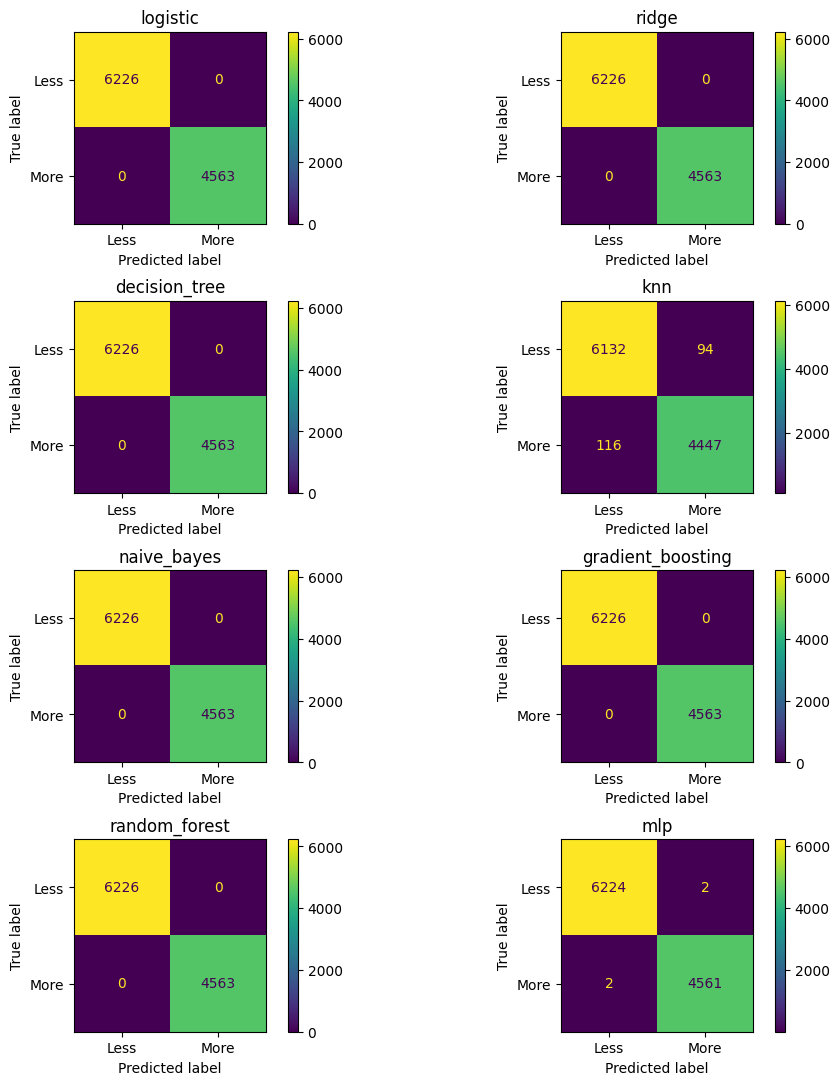

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Точность, полнота, верность (аккуратность), F-мера

In [198]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [199]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

In [200]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

#### Вывод данных с ошибкой предсказания для оценки

In [206]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["above_average_carat"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [carat, Predicted, cut, color, clarity, depth, table, price, x, y, z, above_average_carat]
Index: []

#### Пример использования обученной модели (конвейера) для предсказания

In [208]:
model = class_models[best_model]["pipeline"]

example_id = 4500
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

carat      cut color clarity depth table price    x     y     z  \
4500   0.9  Premium     H     SI1  61.9  58.0  3629  6.2  6.15  3.82   

     above_average_carat  
4500                   1

x         y  Length_to_Width_Ratio     carat    depth     table  \
4500  0.420272  0.363352               1.156653  0.217442  0.10618  0.245753   

             z  above_average_carat  cut_Good  cut_Ideal  ...  color_I  \
4500  0.399417             1.168162       0.0        0.0  ...      0.0   

      color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
4500      0.0         0.0          1.0          0.0          0.0          0.0   

      clarity_VVS1  clarity_VVS2   price  
4500           0.0           0.0  3629.0  

[1 rows x 26 columns]

'predicted: 1 (proba: [4.76016150e-04 9.99523984e-01])'

'real: 1'

#### Подбор гиперпараметров методом поиска по сетке

In [209]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
    "model__max_features": ["sqrt", "log2", 2],
    "model__max_depth": [2, 3, 4, 5, 6, 7, 8, 9 ,10],
    "model__criterion": ["gini", "entropy", "log_loss"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 2,
 'model__max_features': 'sqrt',
 'model__n_estimators': 20}

Обучение модели с новыми гиперпараметрами

In [210]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=7,
    max_features="sqrt",
    n_estimators=30,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [211]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [212]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [213]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

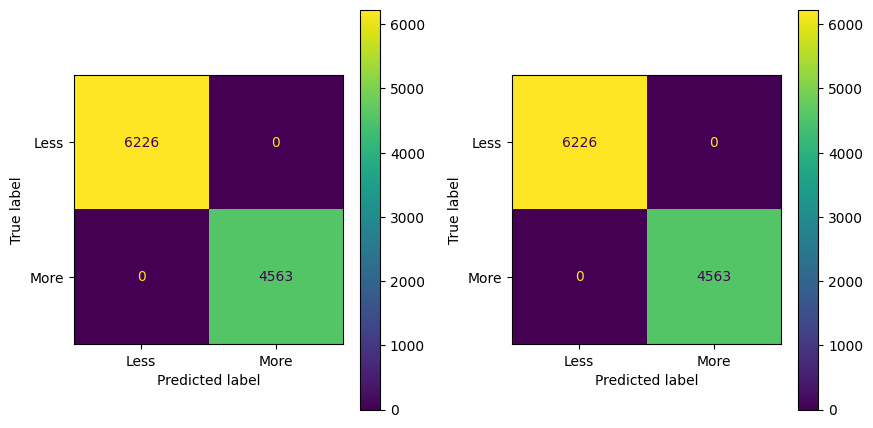

In [215]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()